In [6]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt

In [7]:
dataset=mnist.load_data()

In [8]:
(X_train,y_train),(X_test,y_test)=dataset

In [38]:
X_train.shape

(60000, 28, 28)

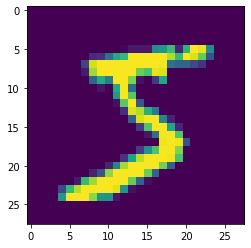

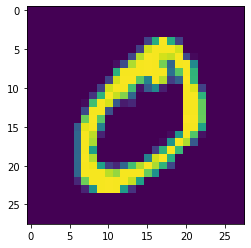

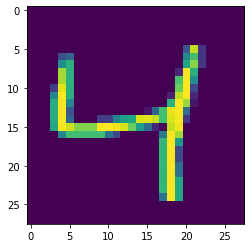

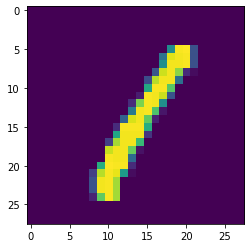

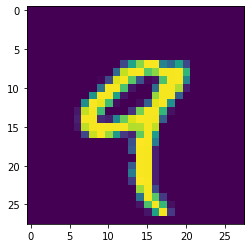

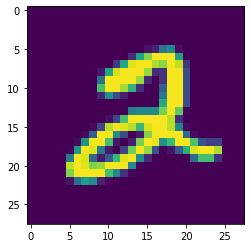

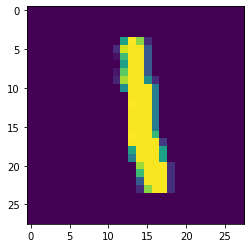

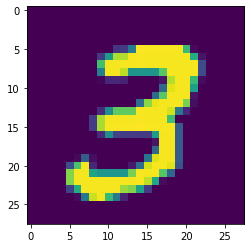

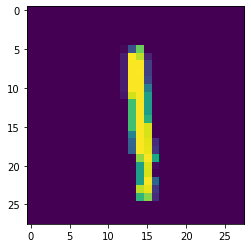

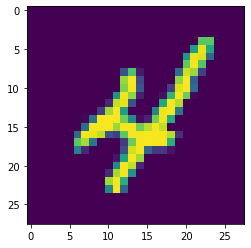

<Figure size 432x288 with 0 Axes>

In [20]:
for i in range(10):
    plt.imshow(X_train[i])
    plt.figure()
plt.show()

In [30]:
X_train.shape[0]

60000

In [39]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [40]:
X_train=X_train/255
X_test=X_test/255

In [41]:
X_train[0].shape

(784,)

In [42]:
Y_train=np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)

In [43]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation

In [ ]:
output_dim=10
input_dim=784
batch_size=128
epochs=20

In [ ]:
model=Sequential()
model.add(Dense(output_dim,input_dim=input_dim,activation='softmax'))

In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test))

In [ ]:
pred=model.evaluate(X_test,Y_test)
print("Score",pred[0])
print("Accuracy",pred[1])

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

x=list(range(1,epochs+1))

vy=history.history['val_loss']
ty=history.history['loss']

def plt_dynamic(x,y,y_1,ax,colors=['b']):
    ax.plot(x,y,'b',label='Train loss')
    ax.plot(x,y_1,'r',label='Test loss')
    if len(x)==1:
        plt.legend()
    fig.canvas.draw()
plt_dynamic(x,vy,ty,ax)

In [ ]:
#Multilayer Perceptron
from keras.layers import BatchNormalization , Dropout 
model2=Sequential()
model2.add(Dense(512,activation='sigmoid',input_shape=(input_dim,)))#we can initialize weights as well using kernel_initialization
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(128,activation='sigmoid'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(output_dim,activation='softmax'))

model2.summary()

In [ ]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history2=model2.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test))

In [ ]:
pred2=model2.evaluate(X_test,Y_test)
print("Score",pred2[0])
print("Accuracy",pred2[1])

In [ ]:
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

x=list(range(1,epochs+1))

vy=history2.history['val_loss']
ty=history2.history['loss']

plt_dynamic(x,vy,ty,ax)

In [ ]:
weights=model2.get_weights()

In [ ]:
print(weights[0].shape)
print(weights[2].shape)
print(weights[4].shape)

In [ ]:
def tune_hyperparameters(activ):
    m=Sequential()
    m.add(Dense(512,activation=activ,input_shape=(input_dim,)))#we can initialize weights as well using kernel_initialization
    m.add(BatchNormalization())
    m.add(Dropout(0.5))
    m.add(Dense(128,activation=activ))
    m.add(BatchNormalization())
    m.add(Dropout(0.5))
    m.add(Dense(output_dim,activation='softmax'))
    m.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return m
    

In [ ]:
activ=['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

m=KerasClassifier(build_fn=tune_hyperparameters,epochs=epochs,batch_size=batch_size,verbose=0)

grid=GridSearchCV(estimator=m,param_grid={'activ':activ},n_jobs=-1,cv=3)
grid_result=grid.fit(X_train[:1000],Y_train[:1000])

In [ ]:
print(grid_result.best_score_," ",grid_result.best_params_)

In [ ]:
grid_result.cv_results_['mean_test_score']